In [1]:
# Import necessary libraries:
# ------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview:

The below method is used to generate occupany grid maps (OGMs). The number of grid cells can be altered based on user definitions.

For demonstration purpose, **sample 14** from **scene 33** is considered here.

In [2]:
# Loading a sample .csv file obtained after data formatting step:
# ----------------------------------------------------------------------

data = pd.read_csv('sample_33_14.csv')
data.head()

,x,y,rotation,height,width,category,visibility,x_anchor,y_anchor,heading_angle,x2,y2,x3,y3,x4,y4
0,1075.890979,811.191884,"(0.9321771452171864, 0.0010142871793830878, 0....",1.730,4.084,ego,4.0,1073.800256,811.931387,-42.436755,1076.814340,809.175602,1077.981703,810.452381,1074.967618,813.208167
1,1151.539000,759.740000,"(0.9890673983243704, 0.0, 0.0, -0.147464170468...",2.938,11.245,vehicle.bus.rigid,3.0,1145.732517,759.974995,-16.960000,1156.488457,756.694783,1157.345483,759.505005,1146.589543,762.785217
2,1017.953000,867.716000,"(0.4882938066505476, 0.0, 0.0, 0.8726792987041...",1.874,4.045,vehicle.car,4.0,1019.809603,866.482509,121.543000,1017.693509,869.929852,1016.096397,868.949491,1018.212491,865.502148
3,1029.398000,844.892000,"(0.9448917874686396, 0.0, 0.0, -0.327382818691...",0.519,0.539,human.pedestrian.adult,4.0,1029.025722,844.854861,-38.220000,1029.449182,844.521391,1029.770278,844.929139,1029.346818,845.262609
4,1089.055000,778.433000,"(0.7775521967618003, 0.0, 0.0, 0.6288184009003...",2.205,7.442,vehicle.truck,4.0,1089.354771,774.563700,77.926000,1090.911450,781.841070,1088.755229,782.302300,1087.198550,775.024930


# OGM principle:

## Generate empty OGM:



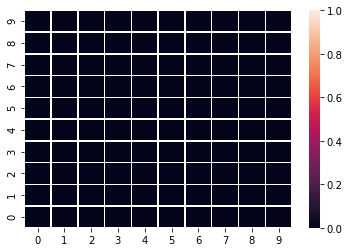

In [3]:
# Empty OGM:
# --------------
base_ogm = np.zeros((10,10))

ax = sns.heatmap(base_ogm, linewidth=0.5,vmin=0, vmax=1)
ax.invert_yaxis()
plt.show()

## Neglect unwanted objects in scene:

_Not all objects in the scene were considered for BEV generation. Let's neglect these object and only consider the relevant objects._

In [4]:
# Objects considered in the OGM:
# ------------------------------------

objects = ["ego", "vehicle.car", "vehicle.trailer", "vehicle.emergency.police", "vehicle.bicycle", "vehicle.motorcycle","vehicle.bus.bendy",
  "vehicle.bus.rigid", "vehicle.truck", "vehicle.emergency.ambulance", "human.pedestrian.adult", "human.pedestrian.child", "human.pedestrian.construction_worker",
  "human.pedestrian.personal_mobility", "human.pedestrian.police_officer", "human.pedestrian.stroller","human.pedestrian.wheelchair"]

In [5]:
# Define empty lists to store information:
# --------------------------------------------

x_grids = []
y_grids = []

x_original = []
y_original = []

# 80m from the center:
# ------------------------
x_origin = data['x'][0]-80
y_origin = data['y'][0]-80

In the below code we are calculating the distance covered by each grid cell by taking the total distance covered by the BEV in one direction (i.e 80m * 2 = 160 m) and dividing it with the number of desired grid cells in one direction which is 10 cells (this results in an OGM that is (10,10) in shape.

In [6]:
# Getting grid occupancy info:
# -------------------------------

grid_cell_distance = int((80*2) / 10)

for i in range(0, len(data)):
    if data['category'][i] in objects:
        x_original.append((data['x'][i]-x_origin)/grid_cell_distance)
        y_original.append((data['y'][i]-y_origin)/grid_cell_distance)
        
        x_grids.append(int(np.ceil((data['x'][i]-x_origin)/grid_cell_distance)))
        y_grids.append(int(np.ceil((data['y'][i]-y_origin)/grid_cell_distance)))

In [7]:
# Grids occupied:
# ----------------

print("The x_original values are: ", x_original)
print("The y_original values are: ", y_original, "\n")

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

The x_original values are:  [5.0, 9.728001302338185, 1.3788763023381847, 2.0941888023381807, 5.82275130233819, 2.918876302338191]
The y_original values are:  [5.0, 1.7842572245783188, 8.532757224578319, 7.1062572245783215, 2.952569724578318, 6.894319724578317] 

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


## Update cell occupany:

_Here the OGM is a numpy array which starts at 0 index. So, grid cell 1 is indexed as 0._

In [8]:
# Printing the updated OGM:
# ------------------------------

for x, y in zip(x_grids, y_grids):
    base_ogm[int(y-1), int(x-1)] = 1
    
print(base_ogm)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Rotate the array to match BEV:

In [9]:
print(np.flip(base_ogm, axis=0))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Plot OGM and compare with BEV:

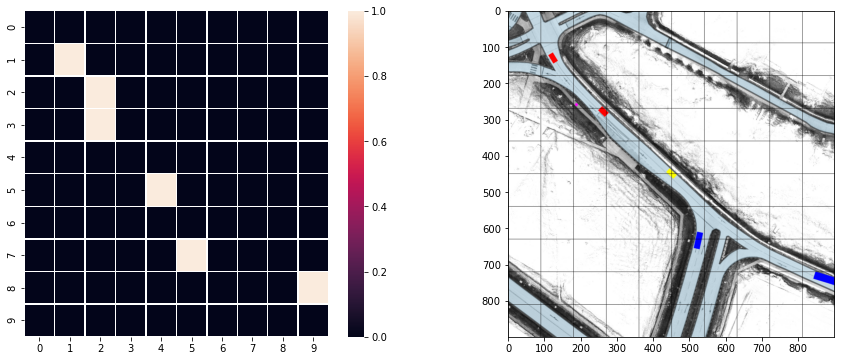

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.heatmap(np.flip(base_ogm, axis=0), ax=axs[0], linewidth=0.5,vmin=0, vmax=1)

# Load the image
# -----------------
img = plt.imread("sample_33_14.png")
img = img[:,:,0:3]

"""
Grid lines at these intervals (in pixels). Here, dx and dy can be different
"""
dx, dy = 90, 90

# Custom (rgb) grid color
# --------------------------
grid_color = [0,0,0]

# Modify the image to include the grid
# -----------------------------------------
img[:,::dy,:] = grid_color
img[::dx,:,:] = grid_color

# Show the result
# ------------------
axs[1].imshow(img)

plt.show()

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

## Problems related to the current principle of OGM generation:

1. There might be instances where the point coincides with the grid line intersection (Ex: the center of EGO always coincides with the grid line intersection at the center of BEV). In this case, the code allots occupany to a cell that is 1 step behind which is not correct. We need to neglect such points.

2. There might be some points that lie outside the BEV i.e greater than 80m. This will throw an error during occupany allotment as the grid cell will be outside the considered number. We need to neglect such points as well.

**_These conditions are satisfied by using multiple conditions for allotment as show below._**

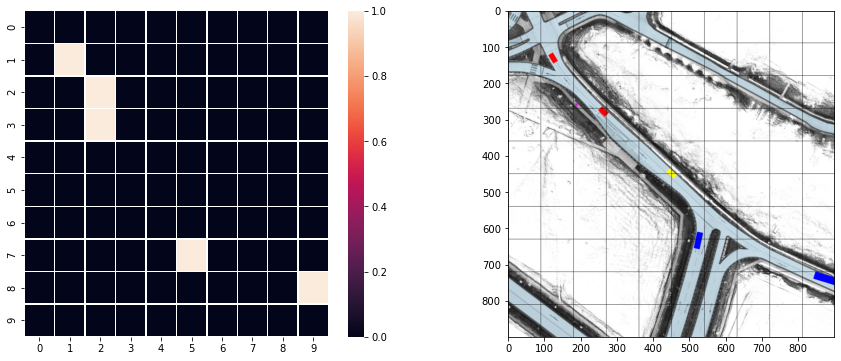

The x_grid values are:  [5, 10, 2, 3, 6, 3]
The y_grid values are:  [5, 2, 9, 8, 3, 7]


In [11]:
# Neglecting points that co-incide with the grid lines:
# ----------------------------------------------------------
base_ogm_2 = np.zeros((10,10))

for x, y in zip(x_original, y_original):
    if (not x.is_integer() and not y.is_integer()) and (np.ceil(x) <= 10 and np.ceil(y) <= 10):
        base_ogm_2[int(np.ceil(y)) - 1, int(np.ceil(x)) - 1] = 1
        
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax = sns.heatmap(np.flip(base_ogm_2, axis=0), ax=axs[0], linewidth=0.5,vmin=0, vmax=1)

# Load the image:
# ------------------
img = plt.imread("sample_33_14.png")
img = img[:,:,0:3]

"""
Grid lines at these intervals (in pixels). Here, dx and dy can be different
"""
dx, dy = 90, 90

# Custom (rgb) grid color:
# ---------------------------
grid_color = [0,0,0]

# Modify the image to include the grid
# -----------------------------------------
img[:,::dy,:] = grid_color
img[::dx,:,:] = grid_color

# Show the result
# ------------------
axs[1].imshow(img)

plt.show()

print("The x_grid values are: ", x_grids)
print("The y_grid values are: ", y_grids)

**_As seen above, the EGO's center that coincides with the grid line intersection has been removed. The allotment will be made by using the other 4 corners of the EGO which creates a more accurate OGM._**

## OGM with considering all corners:

_Here, we are not just considering the center of the object, but, the corners as well for allotment. A numpy array is created using the main code and only visualized here._

In [12]:
sample_1_1_ogm = np.load("sample_1_1.npy")

In [13]:
sample_1_1_ogm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

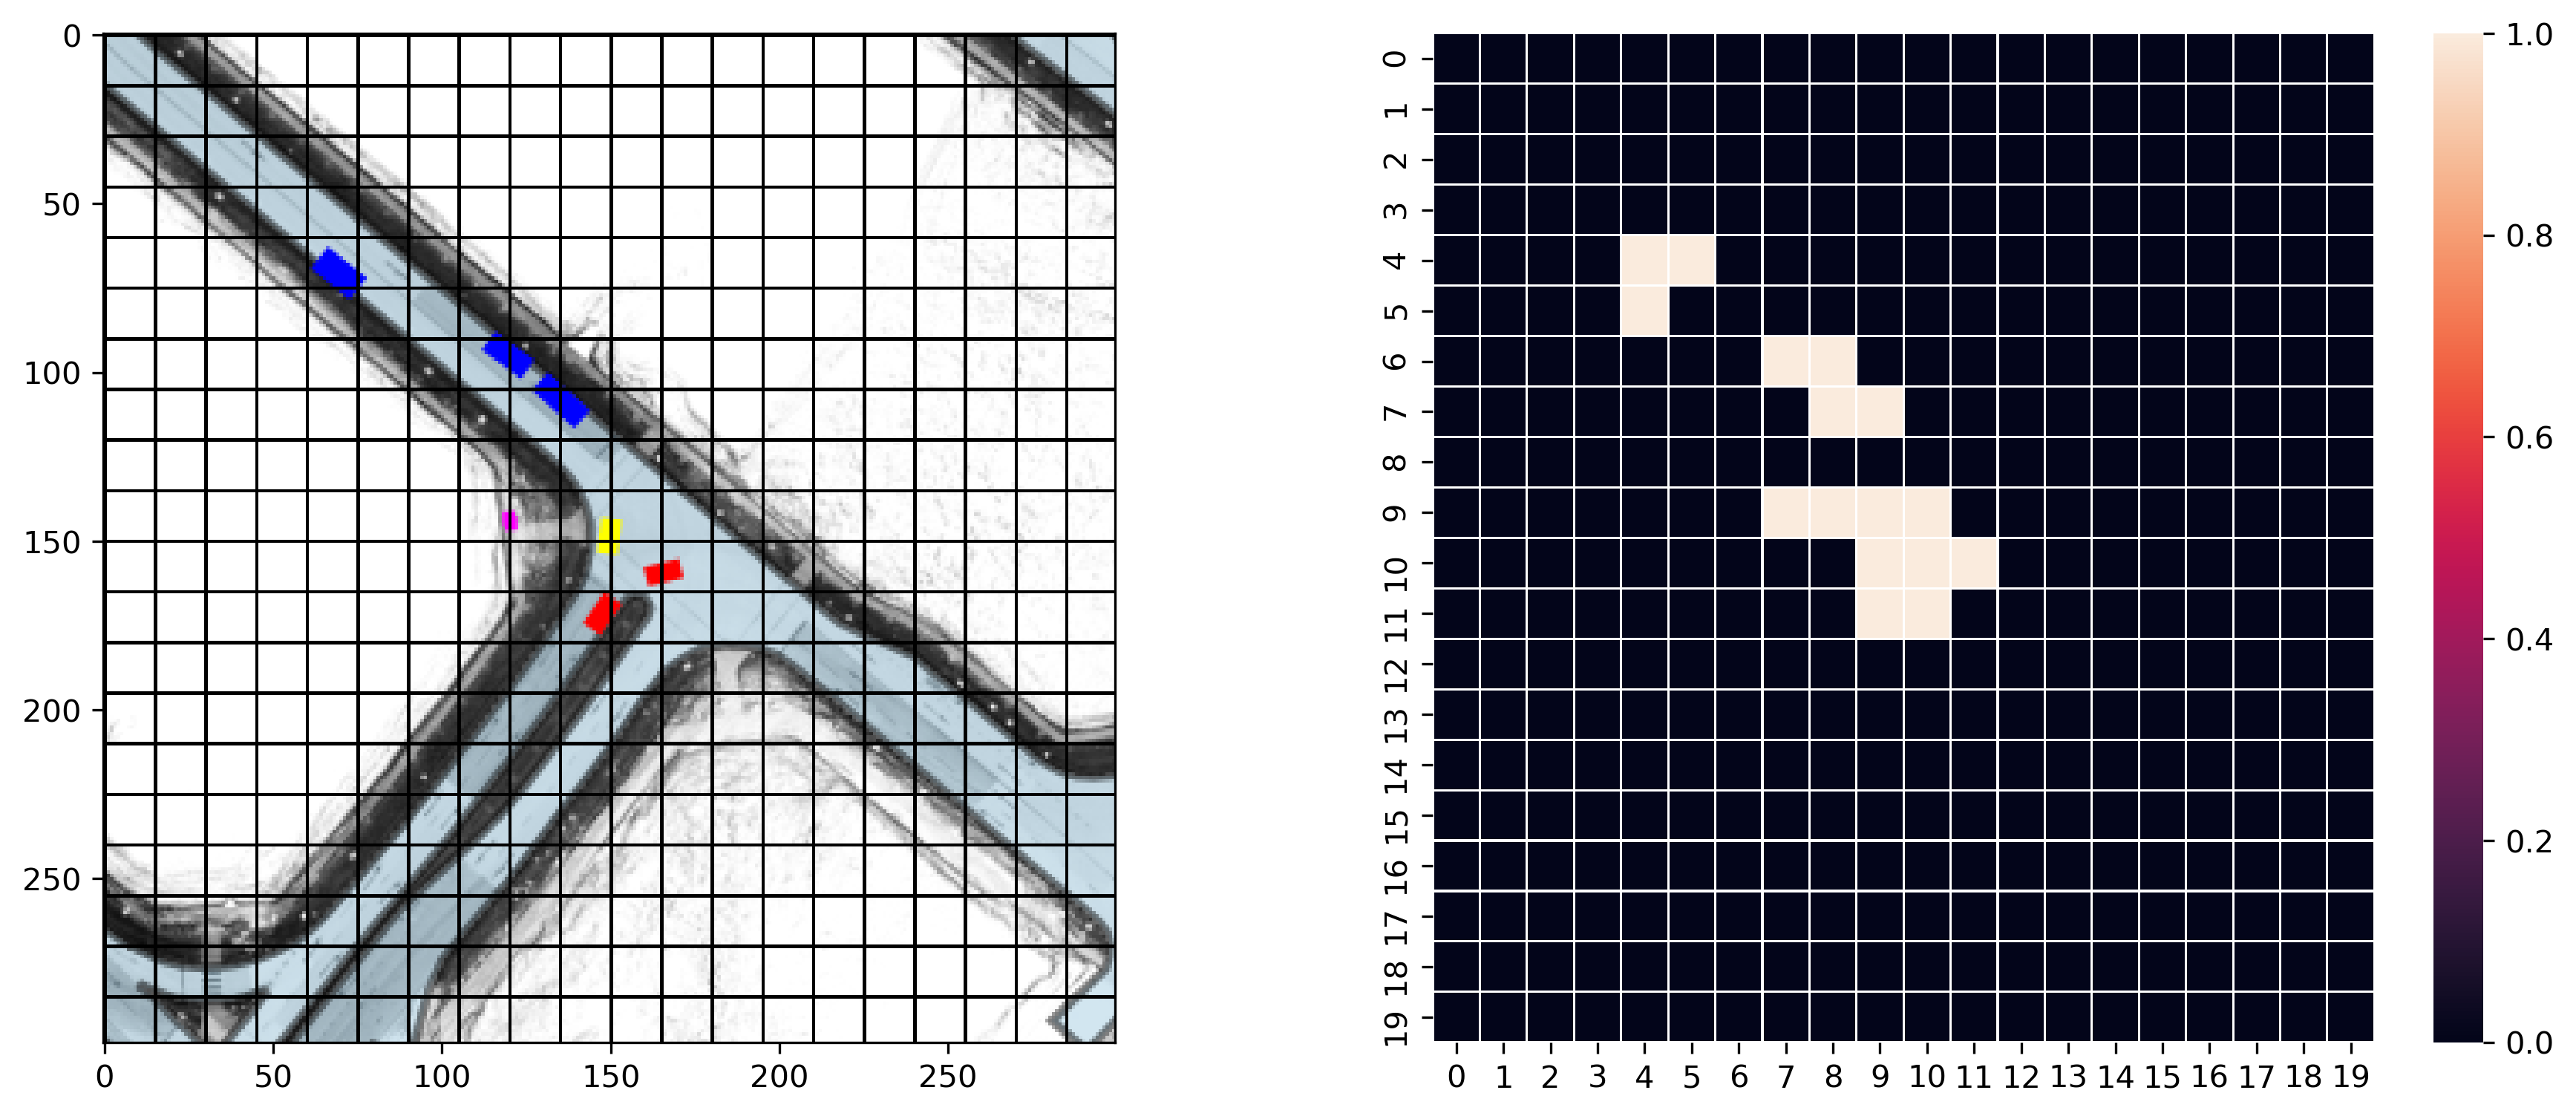

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

ax = sns.heatmap(sample_1_1_ogm, ax=axs[1], linewidth=0.5,vmin=0, vmax=1)

# Load the image
# -----------------
img = plt.imread("sample_1_1.png")
img = img[:,:,0:3]

"""
Grid lines at these intervals (in pixels). Here, dx and dy can be different
"""
dx, dy = 15, 15

# Custom (rgb) grid color
# --------------------------
grid_color = [0,0,0]

# Modify the image to include the grid
# -----------------------------------------
img[:,::dy,:] = grid_color
img[::dx,:,:] = grid_color

# Show the result:
# ------------------
axs[0].imshow(img)

plt.show()

fig.savefig("OGM association")

_The OGM shown above where all 4 corners along with center are considered, is used as ground truth while training the model._